1/1 [==============================] - 1s 700ms/step
Image: C:\Users\36296\Desktop\Bleeding\A0010.png
Predicted class: Bleeding
Confidence: [0.99983764]



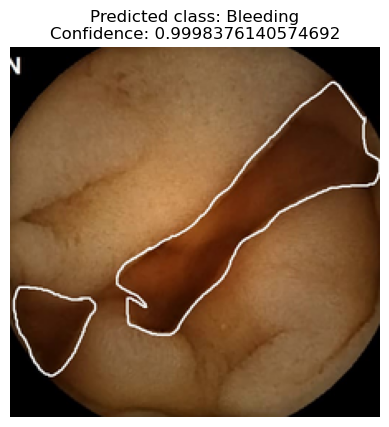

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.image as mpimg

# Load the model
model = tf.keras.models.load_model(r"C:\Users\36296\Desktop\ResNet50\ResNet\best_model_4.h5")

# class labels
class_labels = ["Bleeding", "Non-Bleeding"]

# Function to predict a single image
def predict_single_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    class_index = 0 if predictions[0] <= 0.5 else 1
    class_label = class_labels[class_index]

    confidence = predictions[0]

    return class_label, confidence

# path of single image
image_path_to_predict = r"C:\Users\36296\Desktop\Bleeding\A0010.png"

# Predict the single image
class_label, confidence = predict_single_image(image_path_to_predict)

# Print the prediction result
print(f"Image: {image_path_to_predict}")
print(f"Predicted class: {class_label}")
print(f"Confidence: {1-confidence}\n")

# image with prediction
plt.imshow(image.load_img(image_path_to_predict))
plt.title(f"Predicted class: {class_label}\nConfidence: {1-confidence[0]}")
plt.axis('off')
plt.show()